### t2.micro, AWS Marketplace -> Anaconda with Python 3
### Reference:  https://www.youtube.com/watch?v=Z4XgnOVJhfk

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# kaggle.com/c/titanic/data
data = pd.read_csv('./titanic-train.csv')

# Convert Categorical Data to Binary Fields
dummy_fields = ['Embarked', 'Sex']
dummies      = pd.get_dummies(data[dummy_fields])
data         = pd.concat([data, dummies], axis=1)

# Drop Unnecessary Fields
fields_to_drop = ['PassengerId', 'Ticket', 'Parch', 'Name', 'Cabin', 'Fare', 'Pclass', 'Embarked', 'Sex', 'Sex_male']
data           = data.drop(fields_to_drop, axis=1)

# Calculate Standard Score
mean               = data['Age'].mean()
std                = data['Age'].std()
data.loc[:, 'Age'] = (data['Age'] - mean) / std
data               = data.fillna(0)
data               = data.sample(frac=1).reset_index(drop=True)

# Create Labeled Dataset
X = data.drop('Survived', axis=1).values
y = data[['Survived']].values
print('Dataset: ' + str(X.shape))
print('Labels:  ' + str(y.shape))

Dataset: (891, 6)
Labels:  (891, 1)


Predictions: (891, 1)


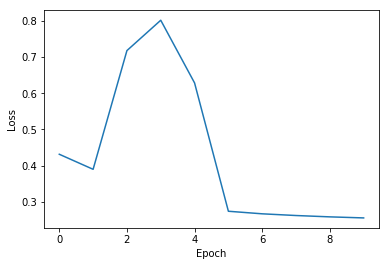

In [2]:
def nn(X, y, hidden_dim=10, learning_rate=0.01, epochs=10, debug=False):

    input_dim  = X.shape[1]
    output_dim = y.shape[1]

    # Create our model
    model = dict(
                 w0 = np.random.randn(input_dim, hidden_dim),
                 w1 = np.random.randn(hidden_dim, output_dim)
                )

    losses = []

    def sigmoid(x, derive=False):
        if derive:
            return x * (1-x)
        return 1/(1+np.exp(-x))

    def logloss(y, y_hat):
        return -np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

    def run(layer0, model):
        layer1 = sigmoid(np.dot(layer0, model['w0']))
        layer2 = sigmoid(np.dot(layer1, model['w1']))
        return layer1, layer2

    def train_step(model):
        
        # Forward Pass
        layer1, layer2 = run(X, model)

        # Backpropagation
        l2_error = -(y / layer2 - (1-y) / (1-layer2))
        l2_delta = l2_error * sigmoid(layer2, derive=True)
        l1_error = l2_delta.dot(model['w1'].T)
        l1_delta = l1_error * sigmoid(layer1, derive=True)

        # Store error for plotting
        loss = logloss(y, layer2) / 2
        losses.append(loss)

        # Update model weights
        model['w1'] -= learning_rate * layer1.T.dot(l2_delta)
        model['w0'] -= learning_rate * X.T.dot(l1_delta)

        return model

    for i in range(epochs):
        model = train_step(model)

    if debug:
        plt.plot(losses)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")

    # Final prediction
    layer1, layer2 = run(X, model)

    return layer2

y_pred = nn(X, y, hidden_dim=10, learning_rate=0.01, epochs=10, debug=True)
print('Predictions: ' + str(y_pred.shape))